# Data Visualization Assignment

# Importing Libraries

In [31]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

pd.set_option("display.float_format", lambda x: f"{x:,.2f}")


# 1. LOAD DATA, CLEAN & CREATE KEY METRICS

In [48]:
file_path = "Confectionary [4564].xlsx"
df = pd.read_excel(file_path, parse_dates=["Date"])

# 1.2 Rename columns for easier coding
df = df.rename(columns={
    "Country(UK)": "Region",
    "Units Sold": "Units_Sold",
    "Cost(£)": "Cost",
    "Profit(£)": "Profit",
    "Revenue(£)": "Revenue"
})

# Standardise product names
df["Confectionary"] = df["Confectionary"].astype(str).str.strip().str.title()


# Ensuring columns  are numeric
for col in ["Units_Sold", "Cost", "Profit", "Revenue"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")


# If Profit is missing or zero compute from Revenue - Cost
if "Profit" not in df.columns:
    df["Profit"] = df["Revenue"] - df["Cost"]
else:
    df["Profit"] = df["Profit"].where(df["Profit"].notna(),
                                      df["Revenue"] - df["Cost"])
    if (df["Profit"].fillna(0) == 0).all() and df["Revenue"].notna().any():
        df["Profit"] = df["Revenue"] - df["Cost"]

df["Cost"]    = df["Cost"].where(df["Cost"].notna(), df["Revenue"] - df["Profit"])
df["Revenue"] = df["Revenue"].where(df["Revenue"].notna(), df["Cost"] + df["Profit"])

# Fill missing units with median 
if df["Units_Sold"].isna().any():
    df["Units_Sold"] = df["Units_Sold"].fillna(df["Units_Sold"].median())

# Drop rows with missing date 
df = df.dropna(subset=["Date"])

df["Profit_Margin"] = df["Profit"] / df["Revenue"]
df["Profit_Margin"].replace([np.inf, -np.inf], np.nan, inplace=True)
df["Profit_Margin_pct"] = df["Profit_Margin"] * 100

df["YearMonth"] = df["Date"].dt.to_period("M").dt.to_timestamp()

print("Data shape after cleaning:", df.shape)
print("\nMissing values per column:")
print(df.isna().sum())
display(df.head())


Data shape after cleaning: (1001, 10)

Missing values per column:
Date                 0
Region               0
Confectionary        0
Units_Sold           0
Cost                 0
Profit               0
Revenue              0
Profit_Margin        5
Profit_Margin_pct    5
YearMonth            0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_10112\319915971.py:42: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Date,Region,Confectionary,Units_Sold,Cost,Profit,Revenue,Profit_Margin,Profit_Margin_pct,YearMonth
0,2002-11-11,England,Biscuit,"1,118.00","2,459.60","3,130.40","749,954.40",0.00,0.42,2002-11-01
1,2002-07-05,England,Biscuit,708.00,"1,557.60","1,982.40","300,758.40",0.01,0.66,2002-07-01
2,2001-10-31,England,Biscuit,"1,269.00","2,791.80","3,553.20","966,216.60",0.00,0.37,2001-10-01
3,2004-09-13,England,Biscuit,"1,631.00","3,588.20","4,566.80","1,596,096.60",0.00,0.29,2004-09-01
4,2004-03-10,England,Biscuit,"2,240.00","4,928.00","6,272.00","3,010,560.00",0.00,0.21,2004-03-01


#  HIGHEST AND LOWEST PROFIT MARGINS


TOP 10 Region–Confectionary by Avg Profit Margin (%):


,Region,Confectionary,Avg_Profit_Margin,Total_Revenue,Total_Units
11,N. Ireland,Biscuit,0.42,"47,215,791.60","44,266.00"
24,Wales,Biscuit,0.46,"65,360,716.80","45,512.00"
28,Wales,Choclate Chunk,0.49,"44,739,986.00","45,180.00"
3,England,Caramel Nut,0.57,"36,355,242.50","25,197.00"
8,Jersey,Caramel Nut,0.62,"47,813,594.50","50,045.50"
27,Wales,Caramel Nut,0.72,"42,565,943.00","46,982.00"
14,N. Ireland,Caramel Nut,0.87,"33,962,569.00","40,494.00"
2,England,Caramel,1.25,"295,831,080.10","185,144.00"
20,Scotland,Caramel Nut,3.62,"40,709,272.00","56,770.00"
17,Scotland,Biscuit,3.83,"70,514,274.60","54,996.00"



BOTTOM 10 Region–Confectionary by Avg Profit Margin (%):


,Region,Confectionary,Avg_Profit_Margin,Total_Revenue,Total_Units
10,Jersey,Plain,0.09,"63,509,766.00","47,851.50"
29,Wales,Plain,0.11,"38,873,031.60","39,322.50"
16,N. Ireland,Plain,0.11,"59,354,299.20","49,664.00"
23,Scotland,Plain,0.11,"55,347,806.40","49,516.00"
1,England,Biscuit Nut,0.17,"49,636,890.50","24,771.00"
18,Scotland,Biscuit Nut,0.18,"137,477,510.00","56,418.00"
4,England,Choclate Chunk,0.20,"36,491,947.25","30,300.50"
19,Scotland,Caramel,0.22,"254,625,834.00","112,194.00"
6,Jersey,Biscuit Nut,0.23,"96,682,421.50","43,688.00"
25,Wales,Biscuit Nut,0.23,"82,634,779.50","43,238.00"


C:\Users\DELL\AppData\Local\Temp\ipykernel_10112\1764377923.py:41: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




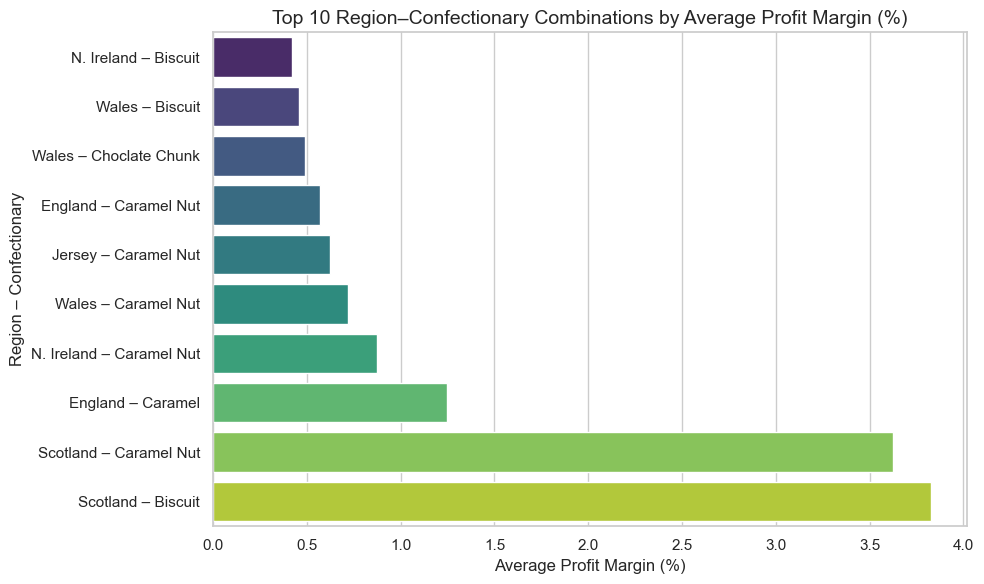

C:\Users\DELL\AppData\Local\Temp\ipykernel_10112\1764377923.py:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




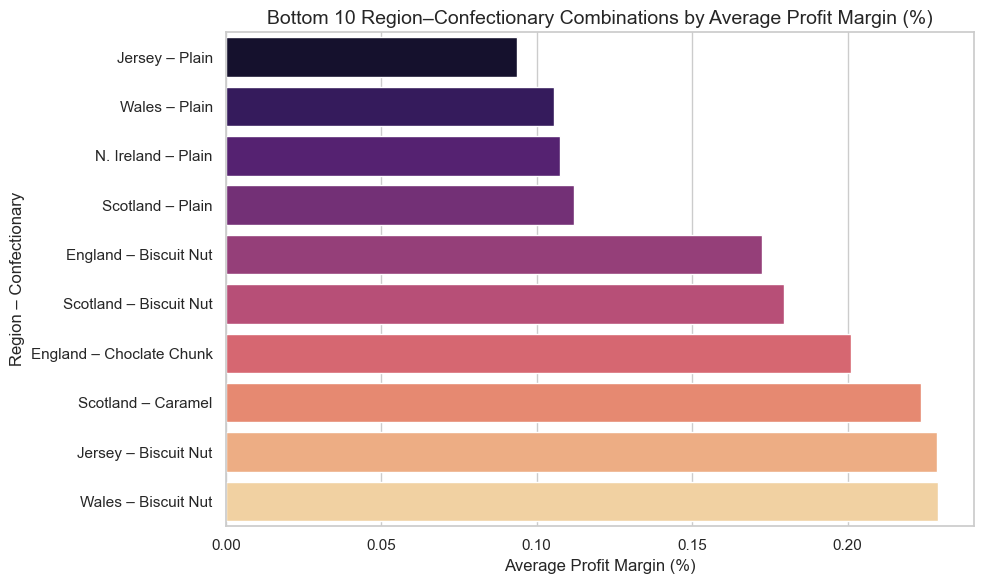

In [72]:
margin_by_product_region = (
    df.groupby(["Region", "Confectionary"])
      .agg(
          Avg_Profit_Margin = ("Profit_Margin_pct", "mean"),
          Total_Revenue     = ("Revenue", "sum"),
          Total_Units       = ("Units_Sold", "sum")
      )
      .reset_index()
)

# Drop rows with undefined margin
margin_by_product_region = margin_by_product_region.dropna(subset=["Avg_Profit_Margin"])

# Top 10 and bottom 10 combinations by average margin
top10_margin = (
    margin_by_product_region
    .sort_values("Avg_Profit_Margin", ascending=False)
    .head(10)
    .sort_values("Avg_Profit_Margin", ascending=True)
)

bottom10_margin = (
    margin_by_product_region
    .sort_values("Avg_Profit_Margin", ascending=True)
    .head(10)
    .sort_values("Avg_Profit_Margin", ascending=True)
)

print("\nTOP 10 Region–Confectionary by Avg Profit Margin (%):")
display(top10_margin)

print("\nBOTTOM 10 Region–Confectionary by Avg Profit Margin (%):")
display(bottom10_margin)

# Add combined label for clearer visualization
top10_margin["Label"] = top10_margin["Region"] + " – " + top10_margin["Confectionary"]
bottom10_margin["Label"] = bottom10_margin["Region"] + " – " + bottom10_margin["Confectionary"]

# ---- TOP 10 CHART ----
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_margin,
    x="Avg_Profit_Margin",
    y="Label",
    palette="viridis"
)
plt.title("Top 10 Region–Confectionary Combinations by Average Profit Margin (%)")
plt.xlabel("Average Profit Margin (%)")
plt.ylabel("Region – Confectionary")
plt.tight_layout()
plt.show()

# ---- BOTTOM 10 CHART ----
plt.figure(figsize=(10, 6))
sns.barplot(
    data=bottom10_margin,
    x="Avg_Profit_Margin",
    y="Label",
    palette="magma"
)
plt.title("Bottom 10 Region–Confectionary Combinations by Average Profit Margin (%)")
plt.xlabel("Average Profit Margin (%)")
plt.ylabel("Region – Confectionary")
plt.tight_layout()
plt.show()



TOP 10 (Region–Confectionary) by Avg Profit Margin:


,Region,Confectionary,Avg_Profit_Margin,Total_Revenue,Total_Units
11,N. Ireland,Biscuit,0.42,"47,215,791.60","44,266.00"
24,Wales,Biscuit,0.46,"65,360,716.80","45,512.00"
28,Wales,Choclate Chunk,0.49,"44,739,986.00","45,180.00"
3,England,Caramel Nut,0.57,"36,355,242.50","25,197.00"
8,Jersey,Caramel Nut,0.62,"47,813,594.50","50,045.50"
27,Wales,Caramel Nut,0.72,"42,565,943.00","46,982.00"
14,N. Ireland,Caramel Nut,0.87,"33,962,569.00","40,494.00"
2,England,Caramel,1.25,"295,831,080.10","185,144.00"
20,Scotland,Caramel Nut,3.62,"40,709,272.00","56,770.00"
17,Scotland,Biscuit,3.83,"70,514,274.60","54,996.00"


BOTTOM 10 (Region–Confectionary) by Avg Profit Margin:


,Region,Confectionary,Avg_Profit_Margin,Total_Revenue,Total_Units
10,Jersey,Plain,0.09,"63,509,766.00","47,851.50"
29,Wales,Plain,0.11,"38,873,031.60","39,322.50"
16,N. Ireland,Plain,0.11,"59,354,299.20","49,664.00"
23,Scotland,Plain,0.11,"55,347,806.40","49,516.00"
1,England,Biscuit Nut,0.17,"49,636,890.50","24,771.00"
18,Scotland,Biscuit Nut,0.18,"137,477,510.00","56,418.00"
4,England,Choclate Chunk,0.20,"36,491,947.25","30,300.50"
19,Scotland,Caramel,0.22,"254,625,834.00","112,194.00"
6,Jersey,Biscuit Nut,0.23,"96,682,421.50","43,688.00"
25,Wales,Biscuit Nut,0.23,"82,634,779.50","43,238.00"


C:\Users\DELL\AppData\Local\Temp\ipykernel_10112\3386936212.py:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




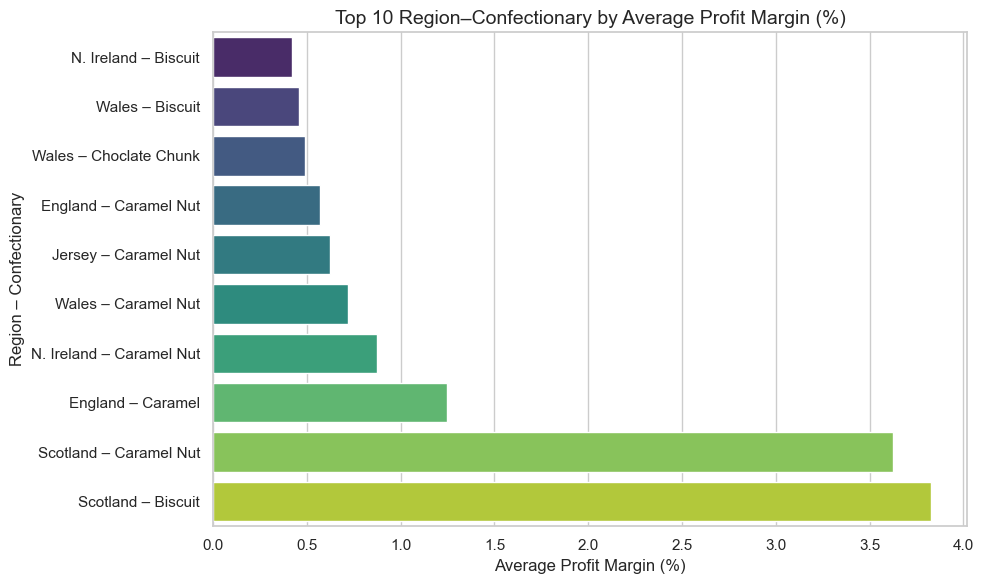

C:\Users\DELL\AppData\Local\Temp\ipykernel_10112\3386936212.py:67: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




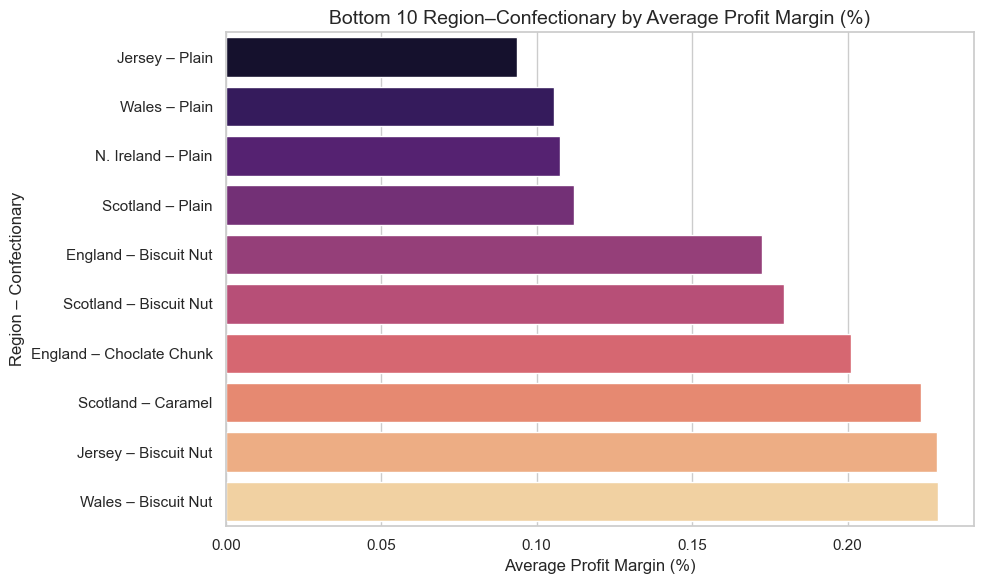

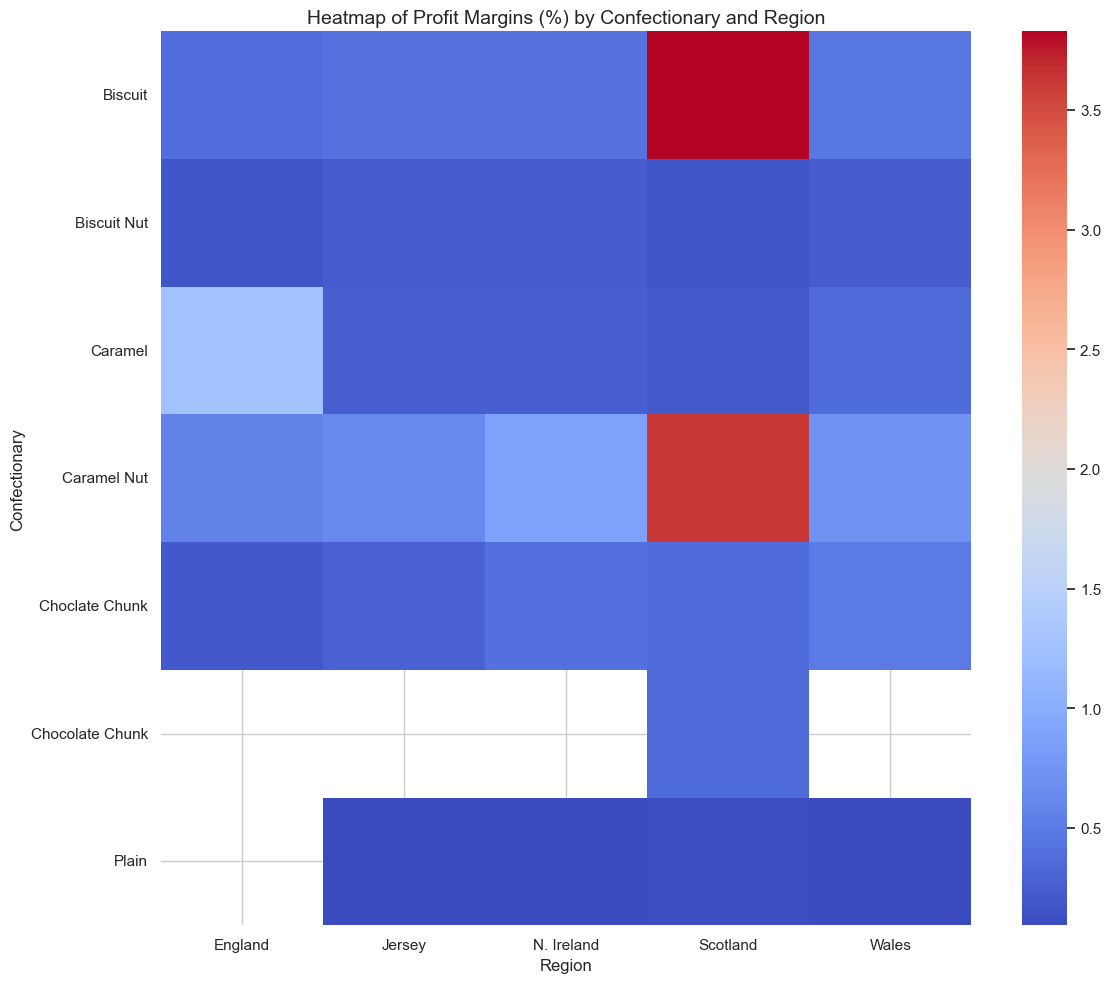

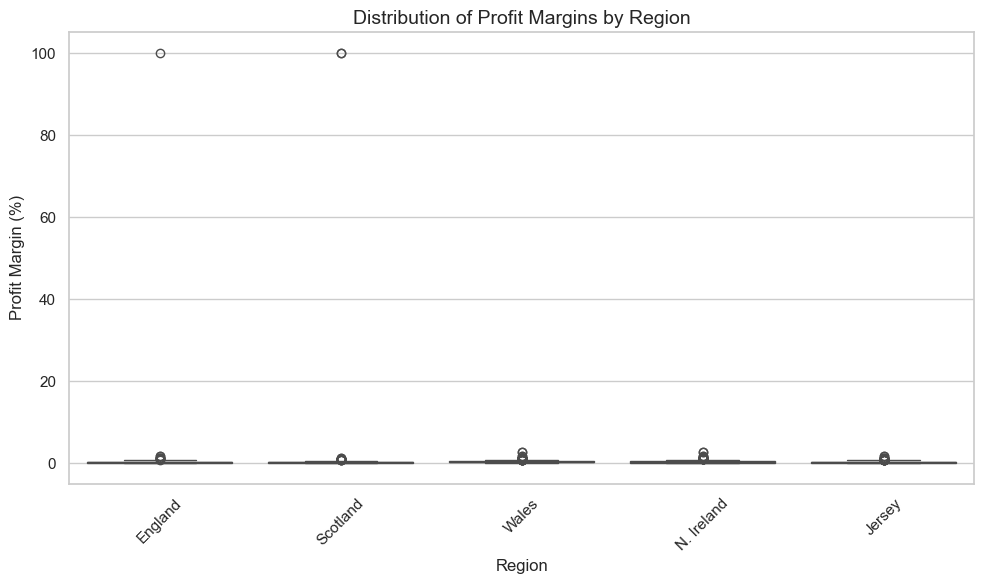

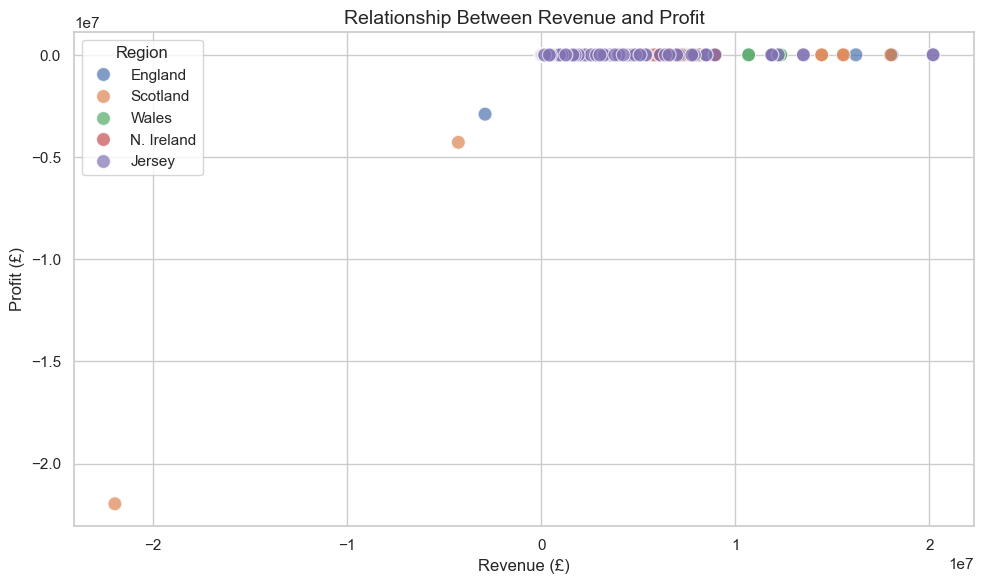

In [74]:
# ============================================================
# STEP 2: HIGHEST AND LOWEST PROFIT MARGINS
# ============================================================

# Calculate average profit margin for each Region–Confectionary combination
margin_by_product_region = (
    df.groupby(["Region", "Confectionary"])
      .agg(
          Avg_Profit_Margin = ("Profit_Margin_pct", "mean"),
          Total_Revenue     = ("Revenue", "sum"),
          Total_Units       = ("Units_Sold", "sum")
      )
      .reset_index()
)

# Remove any rows without valid margin
margin_by_product_region = margin_by_product_region.dropna(subset=["Avg_Profit_Margin"])

# ---- TOP 10 ----
top10_margin = (
    margin_by_product_region
    .sort_values("Avg_Profit_Margin", ascending=False)
    .head(10)
    .sort_values("Avg_Profit_Margin", ascending=True)
)

# ---- BOTTOM 10 ----
bottom10_margin = (
    margin_by_product_region
    .sort_values("Avg_Profit_Margin", ascending=True)
    .head(10)
    .sort_values("Avg_Profit_Margin", ascending=True)
)

print("TOP 10 (Region–Confectionary) by Avg Profit Margin:")
display(top10_margin)

print("BOTTOM 10 (Region–Confectionary) by Avg Profit Margin:")
display(bottom10_margin)

# ---- ADD COMBINED LABELS FOR CLEAN VISUALS ----
top10_margin["Label"] = top10_margin["Region"] + " – " + top10_margin["Confectionary"]
bottom10_margin["Label"] = bottom10_margin["Region"] + " – " + bottom10_margin["Confectionary"]

# ============================================================
# TOP 10 BAR CHART
# ============================================================

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_margin,
    x="Avg_Profit_Margin",
    y="Label",
    palette="viridis"
)
plt.title("Top 10 Region–Confectionary by Average Profit Margin (%)")
plt.xlabel("Average Profit Margin (%)")
plt.ylabel("Region – Confectionary")
plt.tight_layout()
plt.show()

# ============================================================
# BOTTOM 10 BAR CHART
# ============================================================

plt.figure(figsize=(10, 6))
sns.barplot(
    data=bottom10_margin,
    x="Avg_Profit_Margin",
    y="Label",
    palette="magma"
)
plt.title("Bottom 10 Region–Confectionary by Average Profit Margin (%)")
plt.xlabel("Average Profit Margin (%)")
plt.ylabel("Region – Confectionary")
plt.tight_layout()
plt.show()

# ============================================================
# HEATMAP: PROFIT MARGIN (%) BY CONFECTIONARY × REGION
# ============================================================

pivot_margin = df.pivot_table(
    values="Profit_Margin_pct",
    index="Confectionary",
    columns="Region",
    aggfunc="mean"
)

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_margin, cmap="coolwarm", annot=False)
plt.title("Heatmap of Profit Margins (%) by Confectionary and Region")
plt.xlabel("Region")
plt.ylabel("Confectionary")
plt.tight_layout()
plt.show()

# ============================================================
# BOXPLOT: DISTRIBUTION OF PROFIT MARGINS BY REGION
# ============================================================

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Region", y="Profit_Margin_pct")
plt.title("Distribution of Profit Margins by Region")
plt.xlabel("Region")
plt.ylabel("Profit Margin (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================================================
# SCATTER PLOT: PROFIT vs REVENUE
# ============================================================

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Revenue",
    y="Profit",
    hue="Region",
    alpha=0.7,
    s=100
)
plt.title("Relationship Between Revenue and Profit")
plt.xlabel("Revenue (£)")
plt.ylabel("Profit (£)")
plt.tight_layout()
plt.show()


#  REGIONAL COMPARISON OF SALES AND PROFITS


Regional summary (sales & profits):


,Region,Total_Units_Sold,Total_Revenue,Total_Profit,Avg_Profit_Margin
0,England,"281,887.50","439,286,468.95","-2,201,973.90",0.93
1,Jersey,"369,627.00","636,097,786.00","913,678.70",0.31
2,N. Ireland,"308,532.50","440,447,942.80","746,995.00",0.38
3,Scotland,"379,222.00","609,636,969.00","-25,313,112.70",1.22
4,Wales,"295,210.50","396,499,596.90","723,059.50",0.40


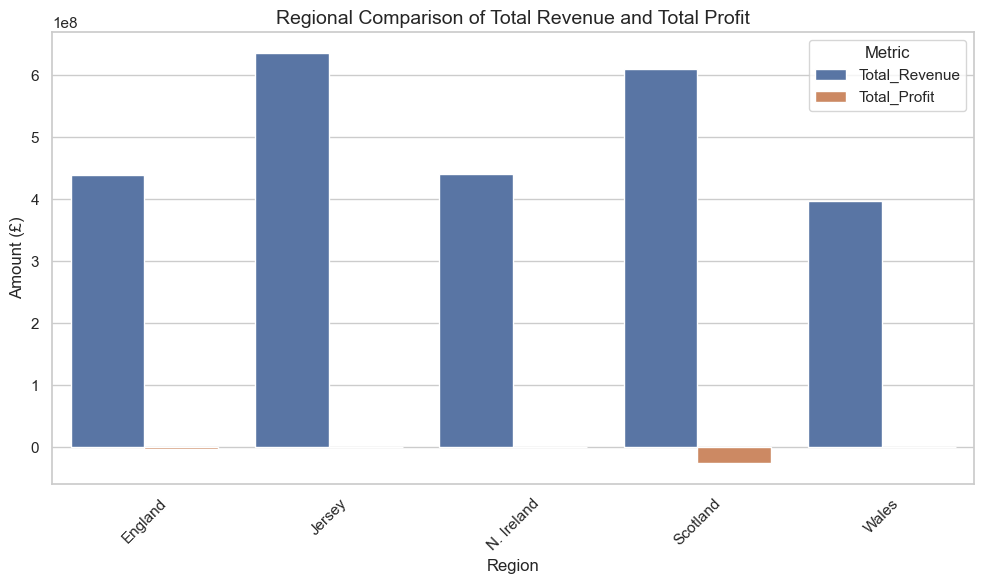

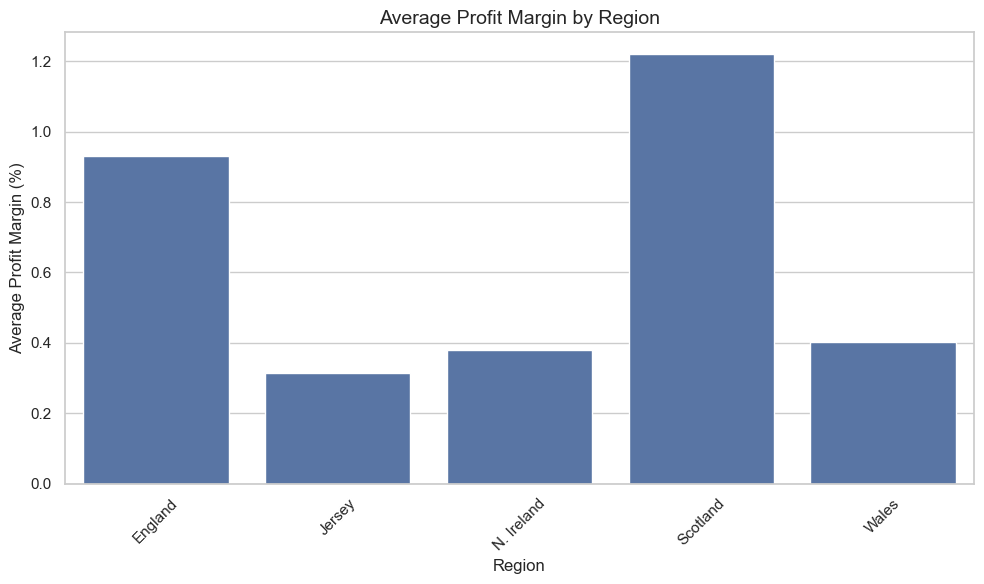

In [37]:
# Aggregate metrics per region
regional_summary = (
    df.groupby("Region")
      .agg(
          Total_Units_Sold  = ("Units_Sold", "sum"),
          Total_Revenue     = ("Revenue", "sum"),
          Total_Profit      = ("Profit", "sum"),
          Avg_Profit_Margin = ("Profit_Margin_pct", "mean")
      )
      .reset_index()
)

print("\nRegional summary (sales & profits):")
display(regional_summary)

#  Bar chart – Total Revenue and Total Profit by Region
regional_melt = regional_summary.melt(
    id_vars="Region",
    value_vars=["Total_Revenue", "Total_Profit"],
    var_name="Metric",
    value_name="Amount"
)

plt.figure(figsize=(10, 6))
sns.barplot(data=regional_melt, x="Region", y="Amount", hue="Metric")
plt.title("Regional Comparison of Total Revenue and Total Profit")
plt.xlabel("Region")
plt.ylabel("Amount (£)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart – Average Profit Margin (%) by Region
plt.figure(figsize=(10, 6))
sns.barplot(data=regional_summary, x="Region", y="Avg_Profit_Margin")
plt.title("Average Profit Margin by Region")
plt.xlabel("Region")
plt.ylabel("Average Profit Margin (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  TIME-BASED SALES TRENDS


Monthly regional summary (first rows):


,YearMonth,Region,Monthly_Revenue,Monthly_Units,Monthly_Profit
0,2000-01-01,England,"816,003.40","1,375.00","3,901.40"
1,2000-01-01,Jersey,"9,874,346.90","6,655.00","19,289.65"
2,2000-01-01,N. Ireland,"4,047,439.00","3,985.00","6,625.90"
3,2000-01-01,Scotland,"11,110,310.60","5,799.00","13,108.80"
4,2000-01-01,Wales,"7,100,118.90","5,689.00","13,299.65"


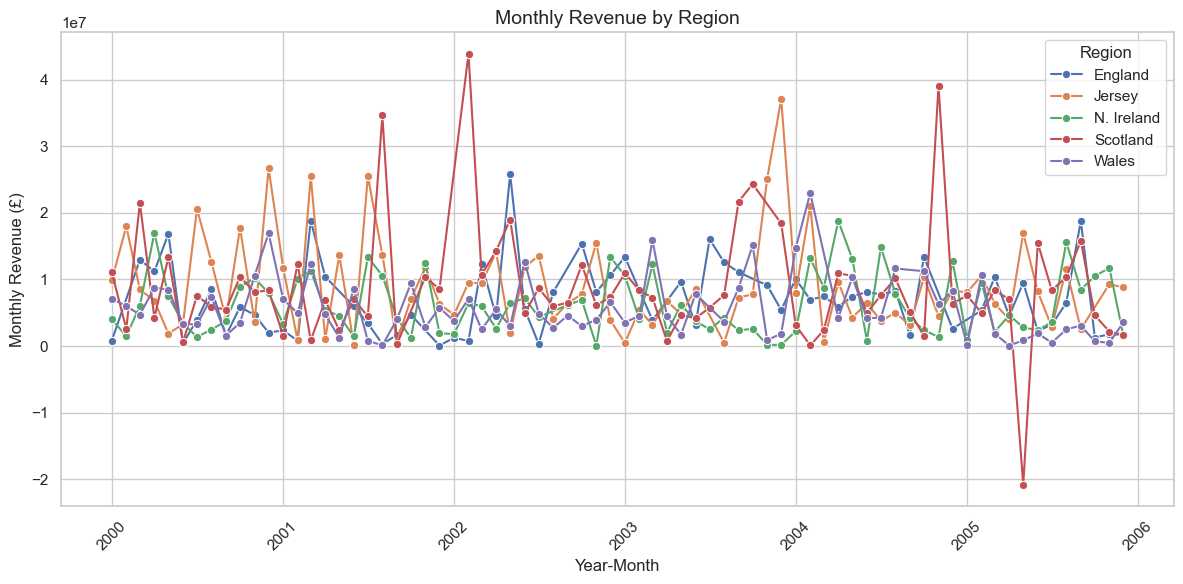

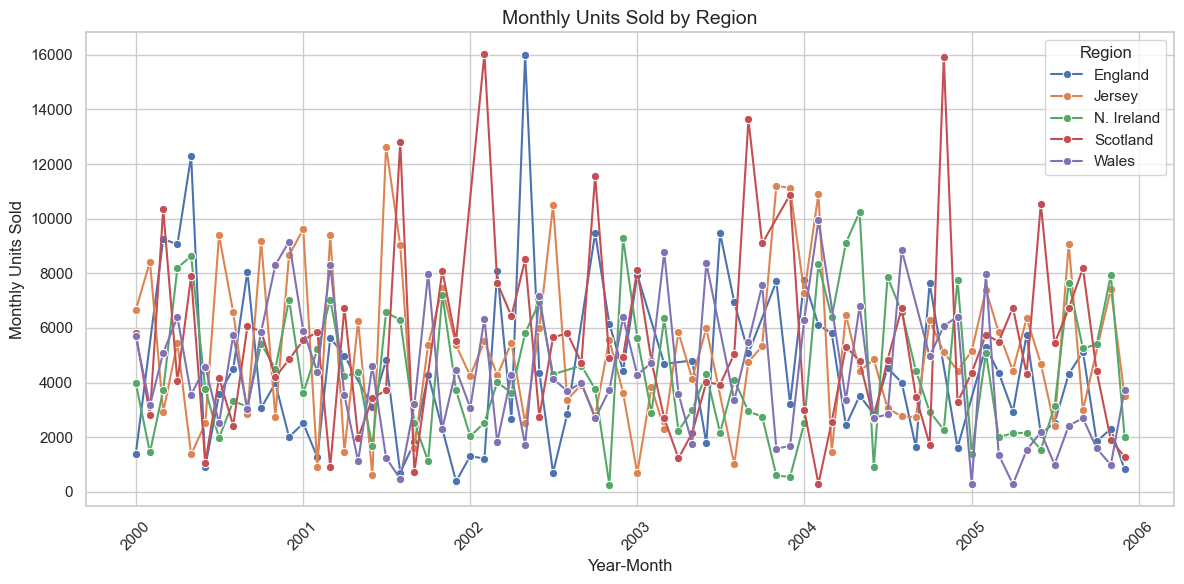

In [52]:
monthly_region = (
    df.groupby(["YearMonth", "Region"])
      .agg(
          Monthly_Revenue = ("Revenue", "sum"),
          Monthly_Units   = ("Units_Sold", "sum"),
          Monthly_Profit  = ("Profit", "sum")
      )
      .reset_index()
)

print("\nMonthly regional summary (first rows):")
display(monthly_region.head())

# Monthly Revenue by Region
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_region,
    x="YearMonth",
    y="Monthly_Revenue",
    hue="Region",
    marker="o"
)
plt.title("Monthly Revenue by Region")
plt.xlabel("Year-Month")
plt.ylabel("Monthly Revenue (£)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Monthly Units Sold by Region
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_region,
    x="YearMonth",
    y="Monthly_Units",
    hue="Region",
    marker="o"
)
plt.title("Monthly Units Sold by Region")
plt.xlabel("Year-Month")
plt.ylabel("Monthly Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  INTERACTIVE DASHBOARD WITH CLEAR NARRATIVE

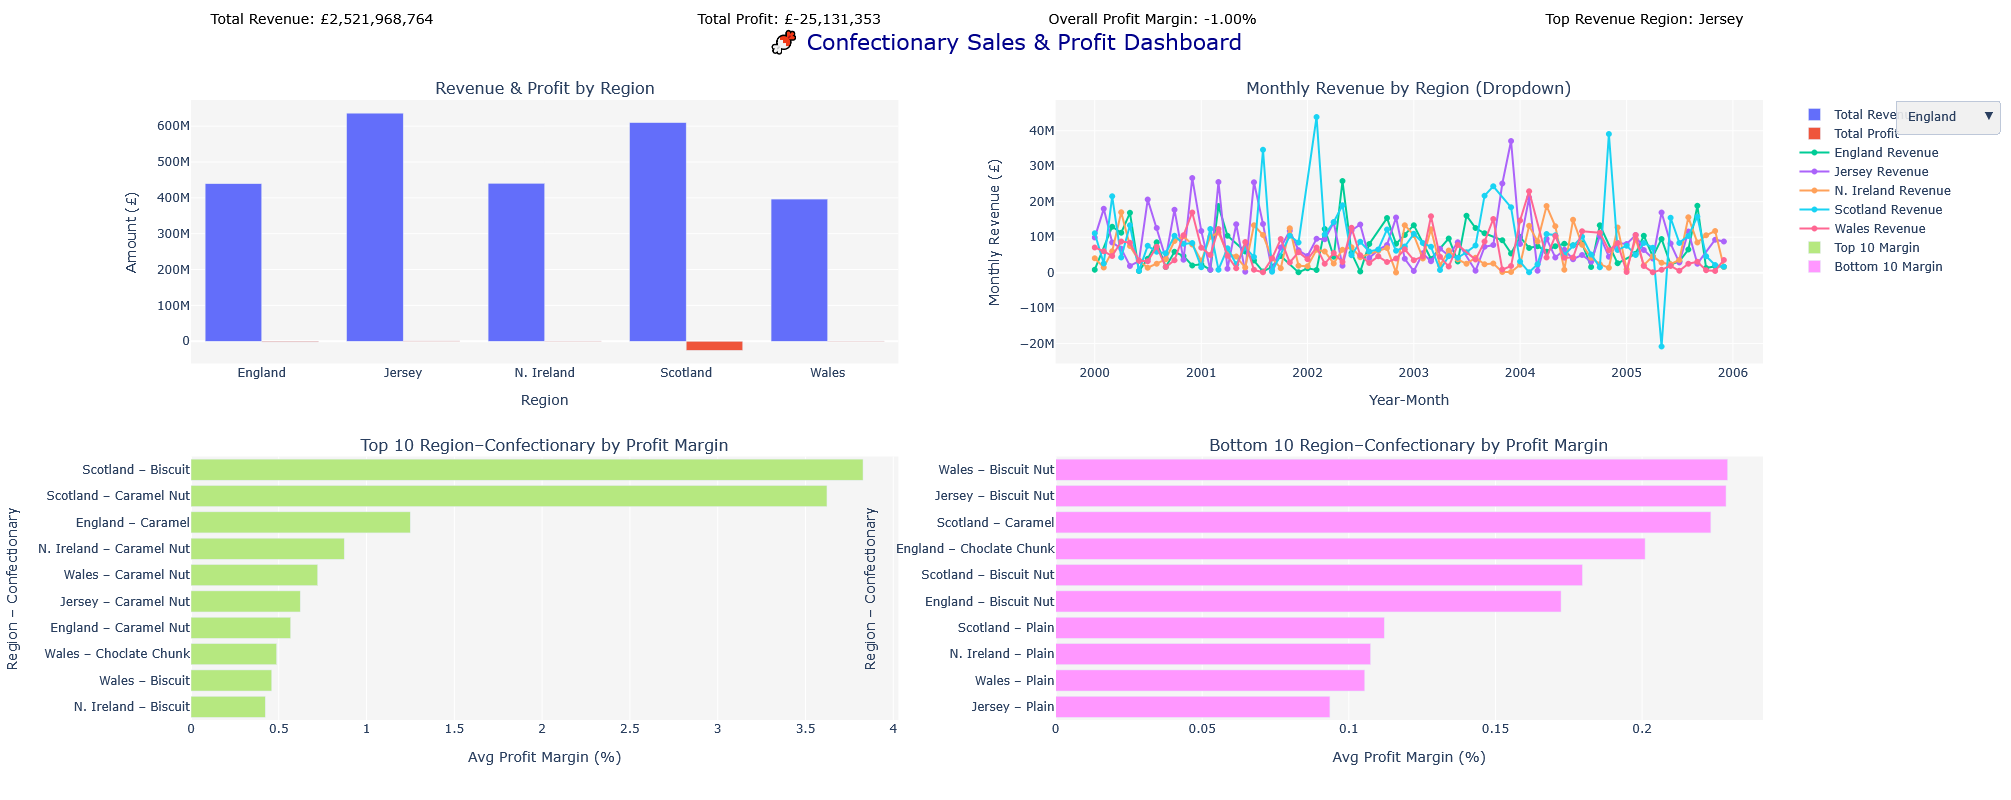

In [92]:

# INTERACTIVE DASHBOARD WITH EXTRA FEATURES

# KPIs (summary metrics) 
total_revenue = df["Revenue"].sum()
total_profit = df["Profit"].sum()
overall_margin = (total_profit / total_revenue) * 100

best_region_rev = regional_summary.loc[
    regional_summary["Total_Revenue"].idxmax(), "Region"
]
best_region_profit = regional_summary.loc[
    regional_summary["Total_Profit"].idxmax(), "Region"
]

regions = regional_summary["Region"].tolist()

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=(
        "Revenue & Profit by Region",
        "Monthly Revenue by Region (Dropdown)",
        "Top 10 Region–Confectionary by Profit Margin",
        "Bottom 10 Region–Confectionary by Profit Margin"
    ),
    vertical_spacing=0.15,
    horizontal_spacing=0.1
)


# PANEL 1 :REVENUE & PROFIT BY REGION

fig.add_trace(
    go.Bar(
        x=regional_summary["Region"],
        y=regional_summary["Total_Revenue"],
        name="Total Revenue",
        hovertemplate="<b>%{x}</b><br>Revenue: £%{y:,.0f}<extra></extra>"
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=regional_summary["Region"],
        y=regional_summary["Total_Profit"],
        name="Total Profit",
        hovertemplate="<b>%{x}</b><br>Profit: £%{y:,.0f}<extra></extra>"
    ),
    row=1, col=1
)


# PANEL 2: MONTHLY REVENUE BY REGION (WITH DROPDOWN)


for region in regions:
    data_region = monthly_region[monthly_region["Region"] == region]
    fig.add_trace(
        go.Scatter(
            x=data_region["YearMonth"],
            y=data_region["Monthly_Revenue"],
            mode="lines+markers",
            name=f"{region} Revenue",
            hovertemplate="<b>%{x|%Y-%m}</b><br>Revenue: £%{y:,.0f}<extra></extra>"
        ),
        row=1, col=2
    )

n_bar_traces   = 2
n_line_traces  = len(regions)
n_other_traces = 2          # panels 3 & 4
total_traces   = n_bar_traces + n_line_traces + n_other_traces

buttons = []
for i, region in enumerate(regions):
    visible = [True] * n_bar_traces          # always show panel 1 bars
    # Panel 2: only the selected region’s line visible
    for j in range(n_line_traces):
        visible.append(j == i)
    # Panels 3 & 4: always visible
    visible.extend([True] * n_other_traces)

    buttons.append(
        dict(
            label=region,
            method="update",
            args=[
                {"visible": visible},
                {"title": f"🍬 Confectionary Dashboard – Focus on {region}"}
            ]
        )
    )


# PANEL 3: TOP 10 MARGIN COMBINATIONS

fig.add_trace(
    go.Bar(
        x=top10_margin["Avg_Profit_Margin"],
        y=top10_margin["Label"],
        orientation="h",
        name="Top 10 Margin",
        hovertemplate="<b>%{y}</b><br>Avg Margin: %{x:.2f}%<extra></extra>"
    ),
    row=2, col=1
)


# PANEL 4: BOTTOM 10 MARGIN COMBINATIONS

fig.add_trace(
    go.Bar(
        x=bottom10_margin["Avg_Profit_Margin"],
        y=bottom10_margin["Label"],
        orientation="h",
        name="Bottom 10 Margin",
        hovertemplate="<b>%{y}</b><br>Avg Margin: %{x:.2f}%<extra></extra>"
    ),
    row=2, col=2
)


# LAYOUT: DROPDOWN, TITLES, AXES

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            x=1.15,
            y=1.0,
            xanchor="right",
            yanchor="top",
            showactive=True,
            bgcolor="rgba(240,240,240,0.9)"
        )
    ],
    title=dict(
        text="🍬 Confectionary Sales & Profit Dashboard",
        x=0.5,
        xanchor="center",
        font=dict(size=22, color="darkblue")
    ),
    barmode="group",
    height=800,
    showlegend=True,
    plot_bgcolor="rgba(245,245,245,1)",
    paper_bgcolor="white"
)

fig.update_xaxes(title_text="Region", row=1, col=1)
fig.update_yaxes(title_text="Amount (£)", row=1, col=1)

fig.update_xaxes(title_text="Year-Month", row=1, col=2)
fig.update_yaxes(title_text="Monthly Revenue (£)", row=1, col=2)

fig.update_xaxes(title_text="Avg Profit Margin (%)", row=2, col=1)
fig.update_yaxes(title_text="Region – Confectionary", row=2, col=1)

fig.update_xaxes(title_text="Avg Profit Margin (%)", row=2, col=2)
fig.update_yaxes(title_text="Region – Confectionary", row=2, col=2)


# KPI ANNOTATIONS (TOP OF THE DASHBOARD)

fig.add_annotation(
    text=f"Total Revenue: £{total_revenue:,.0f}",
    xref="paper", yref="paper",
    x=0.01, y=1.15,
    showarrow=False,
    font=dict(size=14, color="black")
)

fig.add_annotation(
    text=f"Total Profit: £{total_profit:,.0f}",
    xref="paper", yref="paper",
    x=0.32, y=1.15,
    showarrow=False,
    font=dict(size=14, color="black")
)

fig.add_annotation(
    text=f"Overall Profit Margin: {overall_margin:.2f}%",
    xref="paper", yref="paper",
    x=0.68, y=1.15,
    showarrow=False,
    font=dict(size=14, color="black")
)

fig.add_annotation(
    text=f"Top Revenue Region: {best_region_rev}",
    xref="paper", yref="paper",
    x=0.99, y=1.15,
    showarrow=False,
    font=dict(size=14, color="black")
)

fig.show()
